# Statistical Analysis with R

## Simple statistics on simulated samples
> Study of the different modes of graphical description in the continuous and discrete cases as well as probability calculations.
> ***
> ### Continuous probability distribution
> The aim here is to simulate samples x of various sizes of $n$ of different distributions to analyze the results of the unbiased estimates of the mean and the variance as well as the distribution of the realizations of the sample.

In [37]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 150)

> #### $U_{[a,b]}$ distribution with $a = -1$ and $b = 2$
> - Distriution parameters.

In [39]:
a <- -1
b <- 2
m <- (a+b)/2
v <- ((b-a)^2)/12

> - Unbiased estimators.

In [40]:
n <- 10000
x <- runif(n=n, min=a, max=b)
m.est <- mean(x) 
v.est <- var(x)

> - Comparing the value of the unbiased estimator with its respective parameter for a sample of size $n$.

In [41]:
cat("Mean: ", m," | Unbiased estimator: ", m.est, "\nSDev: ", v,"| Unbiased estimator: ", v.est)

Mean:  0.5  | Unbiased estimator:  0.5039064 
SDev:  0.75 | Unbiased estimator:  0.7391811

> - Plotting the distribution of the sample of size $n$.

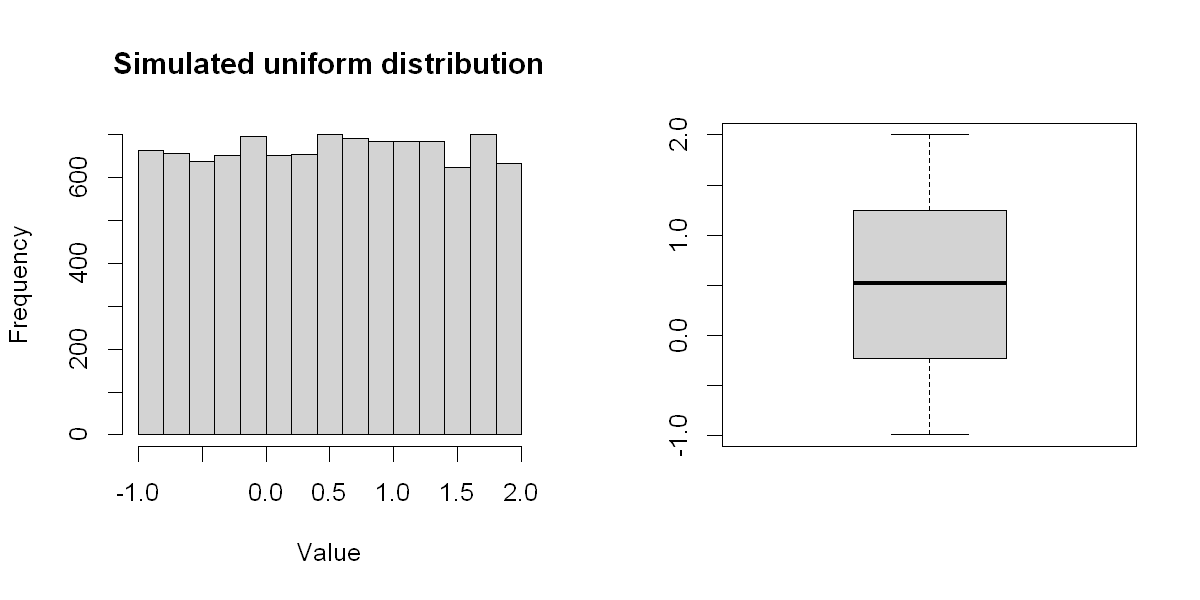

In [42]:
par(mfrow=c(1,2))
hist(x, main="Simulated uniform distribution", xlab="Value", ylab="Frequency")
boxplot(x)

> #### $N_{(m, \sigma^2)}$ distribution with $m = -2$ and $\sigma = 1$
> - Distribution parameters.

In [43]:
m <- -2
v <- 1

> - Unbiased estimators.

In [44]:
n <- 10000
x <- rnorm(n=n, mean=m, sd=sqrt(v))
m.est <- mean(x) 
v.est <- var(x)

> - Comparing the value of the unbiased estimator with its respective parameter for a sample of size $n$.

In [45]:
cat("Mean:", m,"| Unbiased estimator:", m.est, "\nSDev: ", v,"| Unbiased estimator: ", v.est)

Mean: -2 | Unbiased estimator: -2.001323 
SDev:  1 | Unbiased estimator:  0.9938256

> - Plotting the distribution of the sample of size $n$.

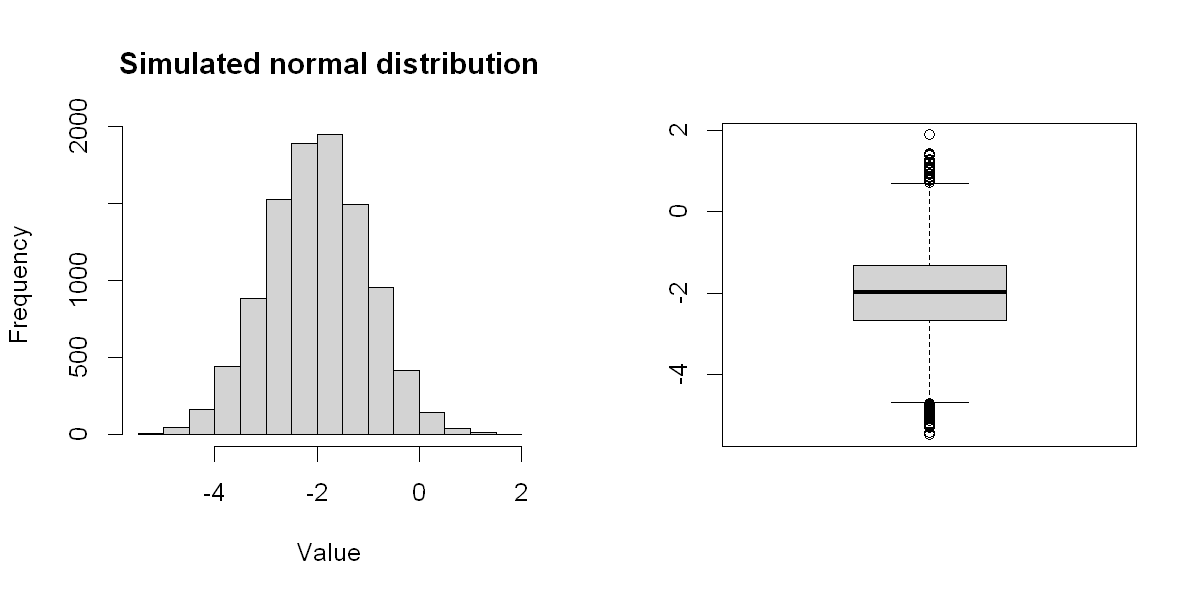

In [46]:
par(mfrow=c(1,2))
hist(x, main="Simulated normal distribution", xlab="Value", ylab="Frequency")
boxplot(x)

***
## Asymptotic behavior of estimators 
> Descriptive statistics, histograms, frequency distributions of samples of estimators.
> ***
> ### Simulation and estimation of the standard deviation for a $N(\mu,\sigma ^2)$ distribution

In [102]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 180)

> - Parameters.

In [49]:
ds1 <- NULL
ds2 <- NULL
ds3 <- NULL
n <- 100
K <- 100
m <- 2
sigma <- 0.1

> - Computation of three different estimators of $\sigma$.

In [50]:
for (k in 1:K) { 
    x <- rnorm(n=n,mean=m,sd=sigma)
    ds1 <- c(ds1, sum((x-mean(x))^2)/n)
    ds2 <- c(ds2, sum((x-mean(x))^2)/(n-1))
    ds3 <- c(ds3, sum((x-m)^2)/n)
}

> - Plotting the different estimation samples compared to $\sigma$ (horizontal line).

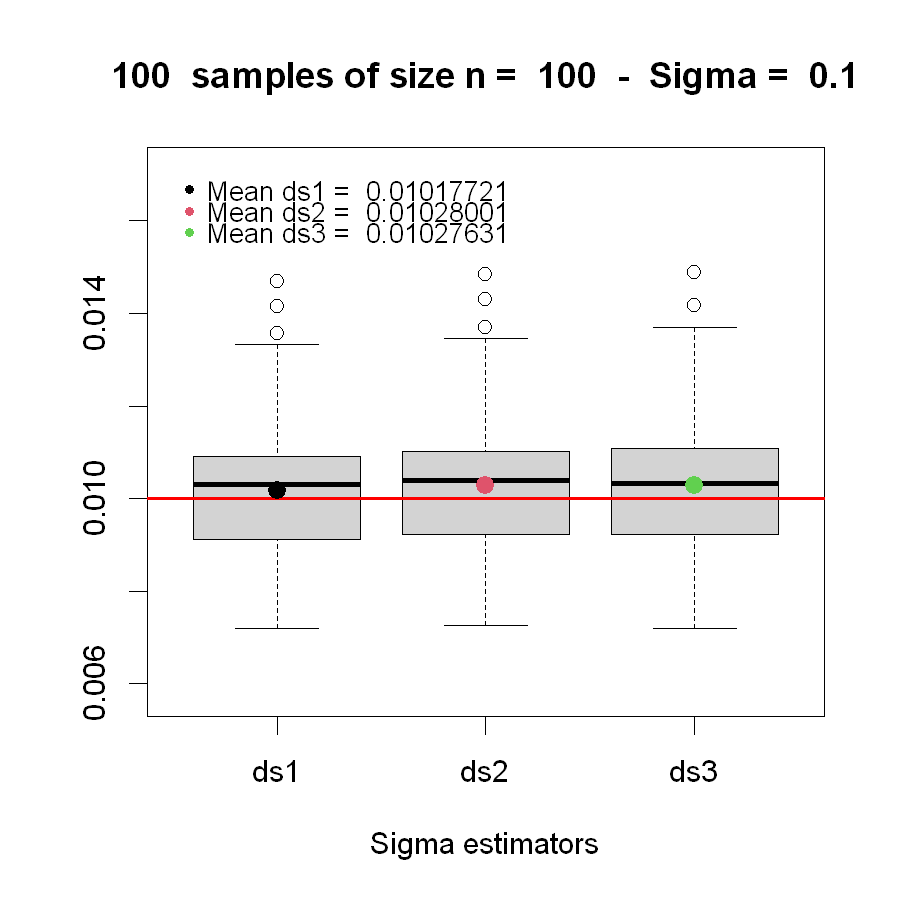

In [114]:
boxplot(c(ds1,ds2,ds3)~rep(c("ds1","ds2","ds3"),each=K),
        ylim=c(min(c(ds1,ds2,ds3))*0.8,max(c(ds1,ds2,ds3))*1.15),
        range=1.5,
        xlab="Sigma estimators",
        ylab="")

abline(h=sigma^2,col="red",lwd=2)

points(1:3,
       c(mean(ds1),mean(ds2),mean(ds3)),
       pch=20,
       col=1:3,
       cex=2) 

title(paste(K, " samples of size n = ",n," -  Sigma = ",sigma))

legend(0.5,
       max(c(ds1,ds2,ds3)*1.15),
       legend=c(paste("Mean ds1 = ",round(mean(ds1),digits=8)),
                paste("Mean ds2 = ",round(mean(ds2),digits=8)),
                paste("Mean ds3 = ",round(mean(ds3),digits=8))),
                pch=20,col=1:3,pt.cex=1,cex=0.9,bty="n")

> ***
> ### Simulation and estimation for a $P(\lambda)$ distribution

In [124]:
options(repr.plot.width=12, repr.plot.height=3, repr.plot.res = 180)

> - Parameters.

In [116]:
K <- 1000
N <- c(5,10,25,50,100,500,1000)
m <- NULL 
sigma2 <- NULL 
lambda <- 1

> - Computation of the estimators for different samples of size $n$.

In [117]:
for (n in N) {
    for (k in 1:K) { x <-rpois(n=n,lambda=1); m <- c(m,mean(x)); sigma2 <- c(sigma2,var(x)) }
}

> - Plotting the estimation of $m$ and $\sigma$ for different sample sizes.

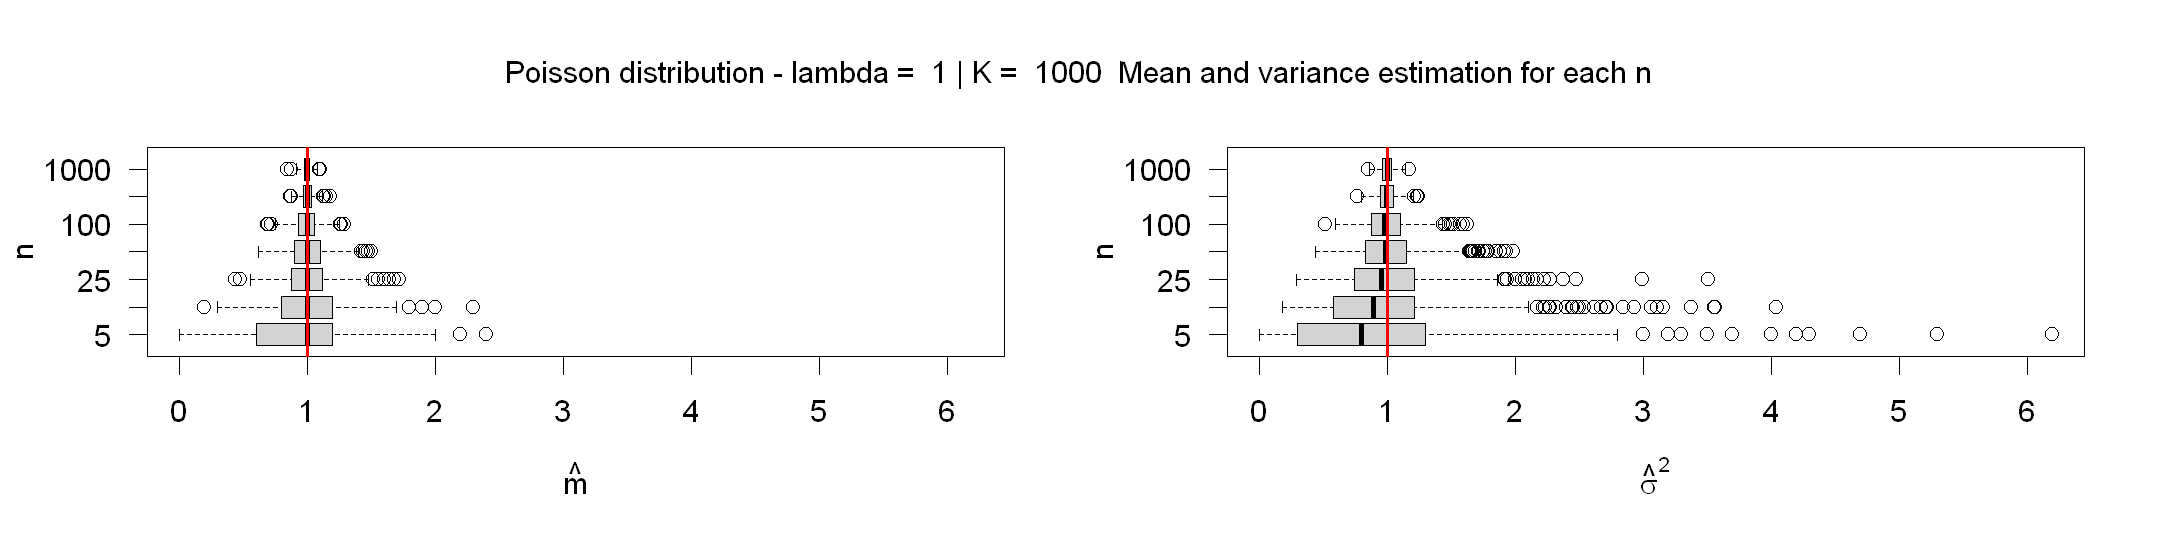

In [132]:
y.min <- min(c(m,sigma2))
y.max <- max(c(m,sigma2))

par(mfrow=c(1,2))

boxplot(m~rep(N,each=K),
        ylim=c(y.min,y.max),
        xlab=expression(paste(hat(m))),
        ylab='n',
        horizontal=TRUE,
        las=1)
abline(v=lambda,col="red",lwd=2)

boxplot(sigma2~rep(N,each=K),
        ylim=c(y.min,y.max),
        xlab=expression(paste(hat(sigma)^2)),
        ylab='n',
        horizontal=TRUE,
        las=1)
abline(v=lambda,col="red",lwd=2)

mtext(paste("Poisson distribution - lambda = ", lambda, "| K = ",K, " Mean and variance estimation for each n"), side = 3, line = -2.5, outer = TRUE)

***
## Confidence Interval
> ### $B(n,p)$ distribution
> - Computation of confidence intervals on $p$ under **Normal** approximation.

In [134]:
IC.Bino <- function(p,n,p.est,niv.conf) {
    u <- qnorm(1 - (1-niv.conf)/2, mean = 0, sd = 1)
    return(abs(p.est-p) - u*sqrt((p*(1-p))/n))
}

IC.Bino2 <- function(p,n,p.est,niv.conf) {
    u <- qnorm(1 - (1-niv.conf)/2, mean = 0, sd = 1)
    return(abs(p.est-p) - 0.5/n - u*sqrt((p*(1-p))/n))
}

> - Analysis of different confidence **interval calculations**.
> - Confidence interval parameters.

In [135]:
accuracy.res <- 5
n <- 20
p.conf <- 0.95
p <- 0.2

> - Computation of the $p$ estimator.

In [136]:
x0 <- rbinom(1,n,p)
p.hat <- x0/n 

> - Computation of assymptotic interval bounds.

In [137]:
p.min.asympt <- uniroot(IC.Bino,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(0,p.hat))$root
p.max.asympt <- uniroot(IC.Bino,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(p.hat,1))$root

> - Computation of assymptotic interval bounds with continuity correction.

In [138]:
p.min.asympt.cont.corr <- uniroot(IC.Bino2,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(0,p.hat))$root
p.max.asympt.cont.corr <- uniroot(IC.Bino2,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(p.hat,1))$root

> - Computation of the quantil  $u_{1-\alpha/2}$.

In [139]:
u <- qnorm(1 - (1-p.conf)/2)

> - Computation of the Wald interval bounds by proportion approximation.

In [140]:
p.min.approx <- p.hat - u*sqrt(p.hat*(1-p.hat)/n) 
p.max.approx <- p.hat + u*sqrt(p.hat*(1-p.hat)/n)

> - Printing the different intervals for comparison.

In [163]:
cat("Assymptotic interval formula without continuity correction at level", p.conf,":     [",round(c(p.min.asympt,p.max.asympt),digits=accuracy.res),"]")
cat("\nAssymptotic interval formula with continuity correction at level", p.conf,":        [",round(c(p.min.asympt.cont.corr,p.max.asympt.cont.corr),digits=accuracy.res),"]")
cat("\nInterval from function binom.test without normal approximation at level", p.conf,": [",round(binom.test(x0,n,conf.level=p.conf)$conf,digits=accuracy.res),"]")
cat("\nInterval from function prop.test at level", p.conf,":\t\t\t       [",round(prop.test(x0,n,conf.level=p.conf,correct=FALSE)$conf,digits=accuracy.res),"]")
cat("\nInterval from function prop.test with continuity correction at level", p.conf,":    [",round(prop.test(x0,n,conf.level=p.conf,correct=TRUE)$conf,digits=accuracy.res),"]")
cat("\nWald interval proportion approximation at level", p.conf,":\t\t\t       [",round(c(p.min.approx,p.max.approx),digits=accuracy.res),"]")

Assymptotic interval formula without continuity correction at level 0.95 :     [ 0.11184 0.4687 ]
Assymptotic interval formula with continuity correction at level 0.95 :        [ 0.09592 0.49412 ]
Interval from function binom.test without normal approximation at level 0.95 : [ 0.08657 0.49105 ]
Interval from function prop.test at level 0.95 :			       [ 0.11186 0.4687 ]
Interval from function prop.test with continuity correction at level 0.95 :    [ 0.09593 0.49412 ]
Wald interval proportion approximation at level 0.95 :			       [ 0.06023 0.43977 ]

> - Graphical representation of intervals computed using the **prop.test()** function under gaussian approximation.

In [185]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 150)

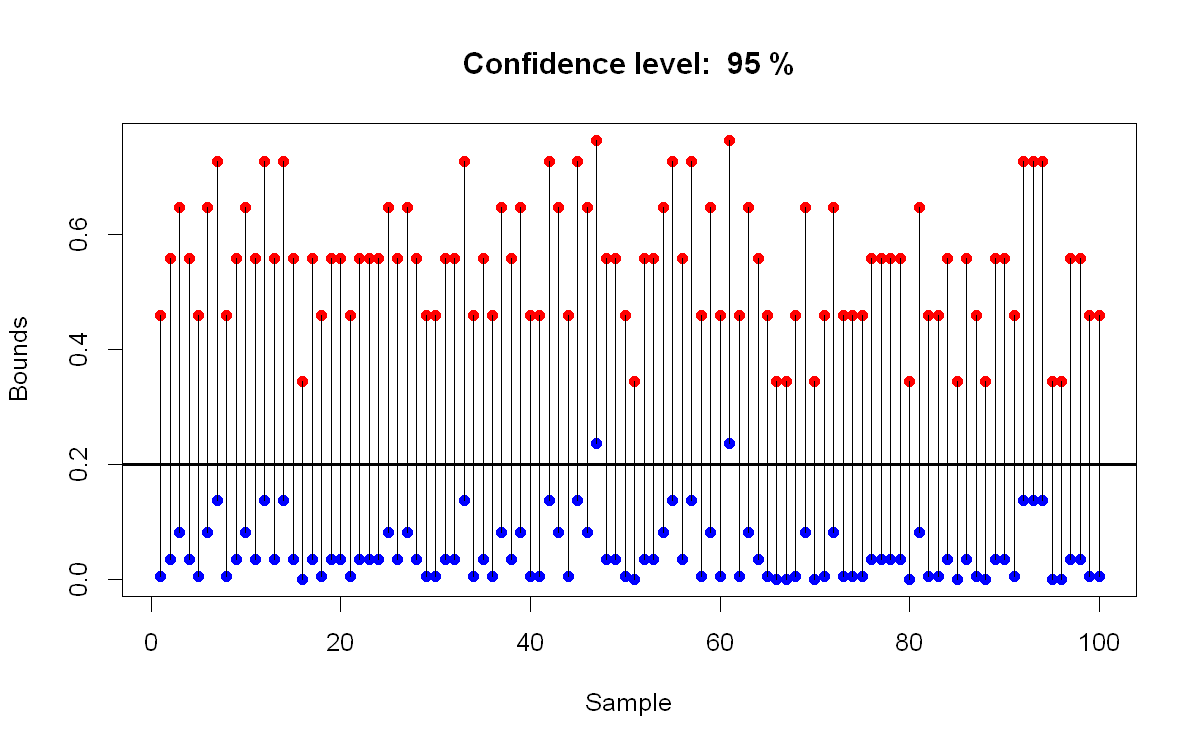

In [186]:
K <- 100
n <- 10
X <- rbinom(K,n,p)

bounds <- NULL
for (k in 1:K) { bounds <- rbind(bounds,prop.test(X[k],n,conf.level=p.conf)$conf) }

ymin <- min(bounds)
ymax <- max(bounds)

plot(1:K,bounds[,1],pch=19,col="blue",ylim=c(ymin,ymax),xlab="Sample",ylab="Bounds")
points(1:K,bounds[,2],pch=19,col="red")
segments(1:K,bounds[,1],1:K,bounds[,2])
title(paste("Confidence level: ",100*p.conf,"%"))
abline(h=p,lwd=2)

> - Analysis of the sample size needed for diffrent accuracy measured $(p - \hat p)$ of different confidence intervals on $p$
> - Parameters.

In [ ]:
p<-seq(0.01,0.5,by=0.01)
p.conf<-0.95
accuracy.inter1<-0.01
accuracy.inter2<-0.02
accuracy.inter3<-0.03
accuracy.inter4<-0.04
p.conf.bil<-1-(1-p.conf)/2
u<-qnorm(p.conf.bil)
N1<-NULL                
N2<-NULL
N3<-NULL
N4<-NULL

> - Computation of the required sample size $n$ for each probability for each required accuracy.

In [ ]:
for (k in 1:length(p)) {
    N1<-c(N1,u^2*p[k]*(1-p[k])/(accuracy.inter1^2))
    N2<-c(N2,u^2*p[k]*(1-p[k])/(accuracy.inter2^2))
    N3<-c(N3,u^2*p[k]*(1-p[k])/(accuracy.inter3^2))
    N4<-c(N4,u^2*p[k]*(1-p[k])/(accuracy.inter4^2))
}

> - Plotting the difference.

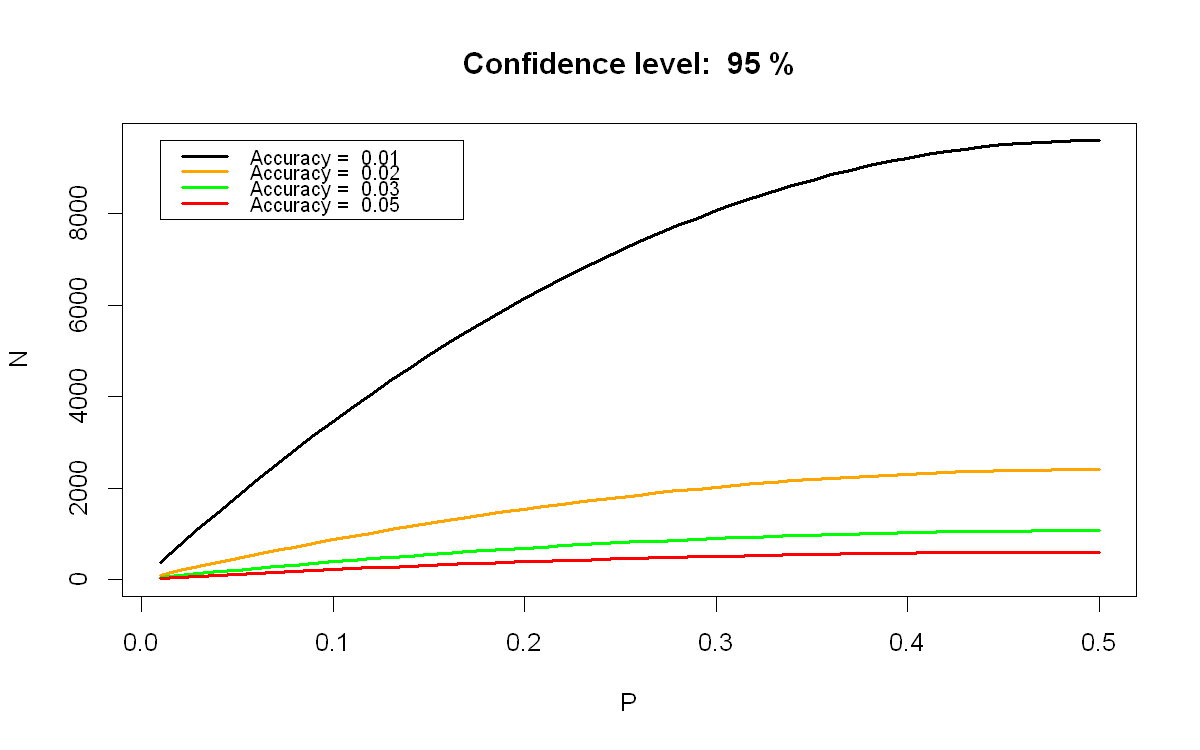

In [217]:
col<-c("black","orange","green","red")
plot(p,floor(N1),type="l",lwd=2,xlab="P",ylab="N",ylim=c(0,max(N1)))
lines(p,floor(N2),type="l",lwd=2,col=col[2])
lines(p,floor(N3),type="l",lwd=2,col=col[3])
lines(p,floor(N4),type="l",lwd=2,col=col[4])
title(paste("Confidence level: ",100*p.conf,"%"))
legend(min(p),max(N1),cex=0.8, lty=1,lwd=2,legend=paste("Accuracy = ",c(0.01,0.02,0.03,0.05)),col=col)

> ***
> ### Gaussian distribution
> - Parameters.

In [218]:
K <- 100
n <- 10
digits <- 5
m <- 2
sigma2 <- 1.5
sigma <- sqrt(sigma2)
p.conf <- 0.9
p.conf.bil <- 1-(1-p.conf)/2

> - **Exact** interval computation.

In [219]:
x <- rnorm(n=n,mean=m,sd=sigma)
l.inf.m <- mean(x) + qt(1 - p.conf.bil,df=n-1) * sqrt(var(x)/n)
l.sup.m <- mean(x) + qt(p.conf.bil,df=n-1) * sqrt(var(x)/n)

> - **Bootstrap** interval computation.

In [220]:
bootstrap <- NULL
for (k in 1:K) { bootstrap <- rbind(bootstrap,sample(x,n,replace=TRUE)) }
L.quantiles <- quantile(apply(bootstrap,MARGIN=1,FUN=mean),probs=c((1-p.conf)/2 , 1-(1-p.conf)/2))

In [222]:
cat("For m = ",m,"at confidence level:", p.conf,"and n = ", n, ":\n\nExact interval on m :      ",round(c(l.inf.m, l.sup.m),digits=digits),"\nBootstraped interval on m :",round(L.quantiles,digits=digits))

For m =  2 at confidence level: 0.9 and n =  10 :

Exact interval on m :       0.77798 2.25646 
Bootstraped interval on m : 0.93746 2.13294

***
## Hypothesis Testing
> The aim here is to use graphical representation oh hypothesis testing to understand the effect implied by variations in values of *n* and $\alpha$.
> - Parameters.

In [242]:
sigma <- 7
m0 <- 80
m1 <- 78

> - Function coloring both errors of the hypothesis testing depending on $\alpha$ and $n$.

In [243]:
graphical.errors <- function(alpha, n){

#Computation
threshold <- m0+(sigma/sqrt(n))*qnorm(alpha, mean = 0, sd = 1)
beta <- 1-pnorm((sqrt(n)/sigma)*(threshold-m1), mean = 0, sd = 1)

#Plot Lines
x.H0 <- seq(m0-3.5*sigma/sqrt(n), m0+3.5*sigma/sqrt(n), length=500)
x.H1 <- seq(m1-3.5*sigma/sqrt(n), m1+3.5*sigma/sqrt(n), length=500)
x.H0.H1 <- c(x.H0,x.H1)
plot(x.H0, dnorm(x.H0,m0,sigma/sqrt(n)), type = "l", main = "", xlim=c(min(x.H0.H1),max(x.H0.H1)) , sub = "", xlab = "", ylab = "")
lines(x.H1, dnorm(x.H1,m1,sigma/sqrt(n)), type = "l" , xlab = "", ylab = "")

#Separate outcomes
abline(h=0)
abline(v=threshold,lwd=2)

#Color Alpha
x.alpha <- seq(min(x.H0),threshold,length=500)
y.alpha <- c(rep(0,length(x.alpha)),rev(dnorm(x.alpha,m0,sigma/sqrt(n))))
x.alpha <- c(x.alpha,rev(x.alpha))
polygon(x.alpha, y.alpha, col = "red")

#Color Beta
x.beta <- seq(threshold,max(x.H1),length=500)
y.beta <- c(rep(0,length(x.beta)),rev(dnorm(x.beta,m1,sigma/sqrt(n))))
x.beta <- c(x.beta,rev(x.beta))
polygon(x.beta, y.beta, col = "yellow")

#Plot Titles
mtext("Alpha : Red  /  Beta : Yellow", side = 3, line = -1.8, outer = TRUE)
title(paste("\nn =",n," Alpha =",alpha))
}

> - Plotting the result by changing respectively values of $\alpha$ and $n$.

In [244]:
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res = 200)

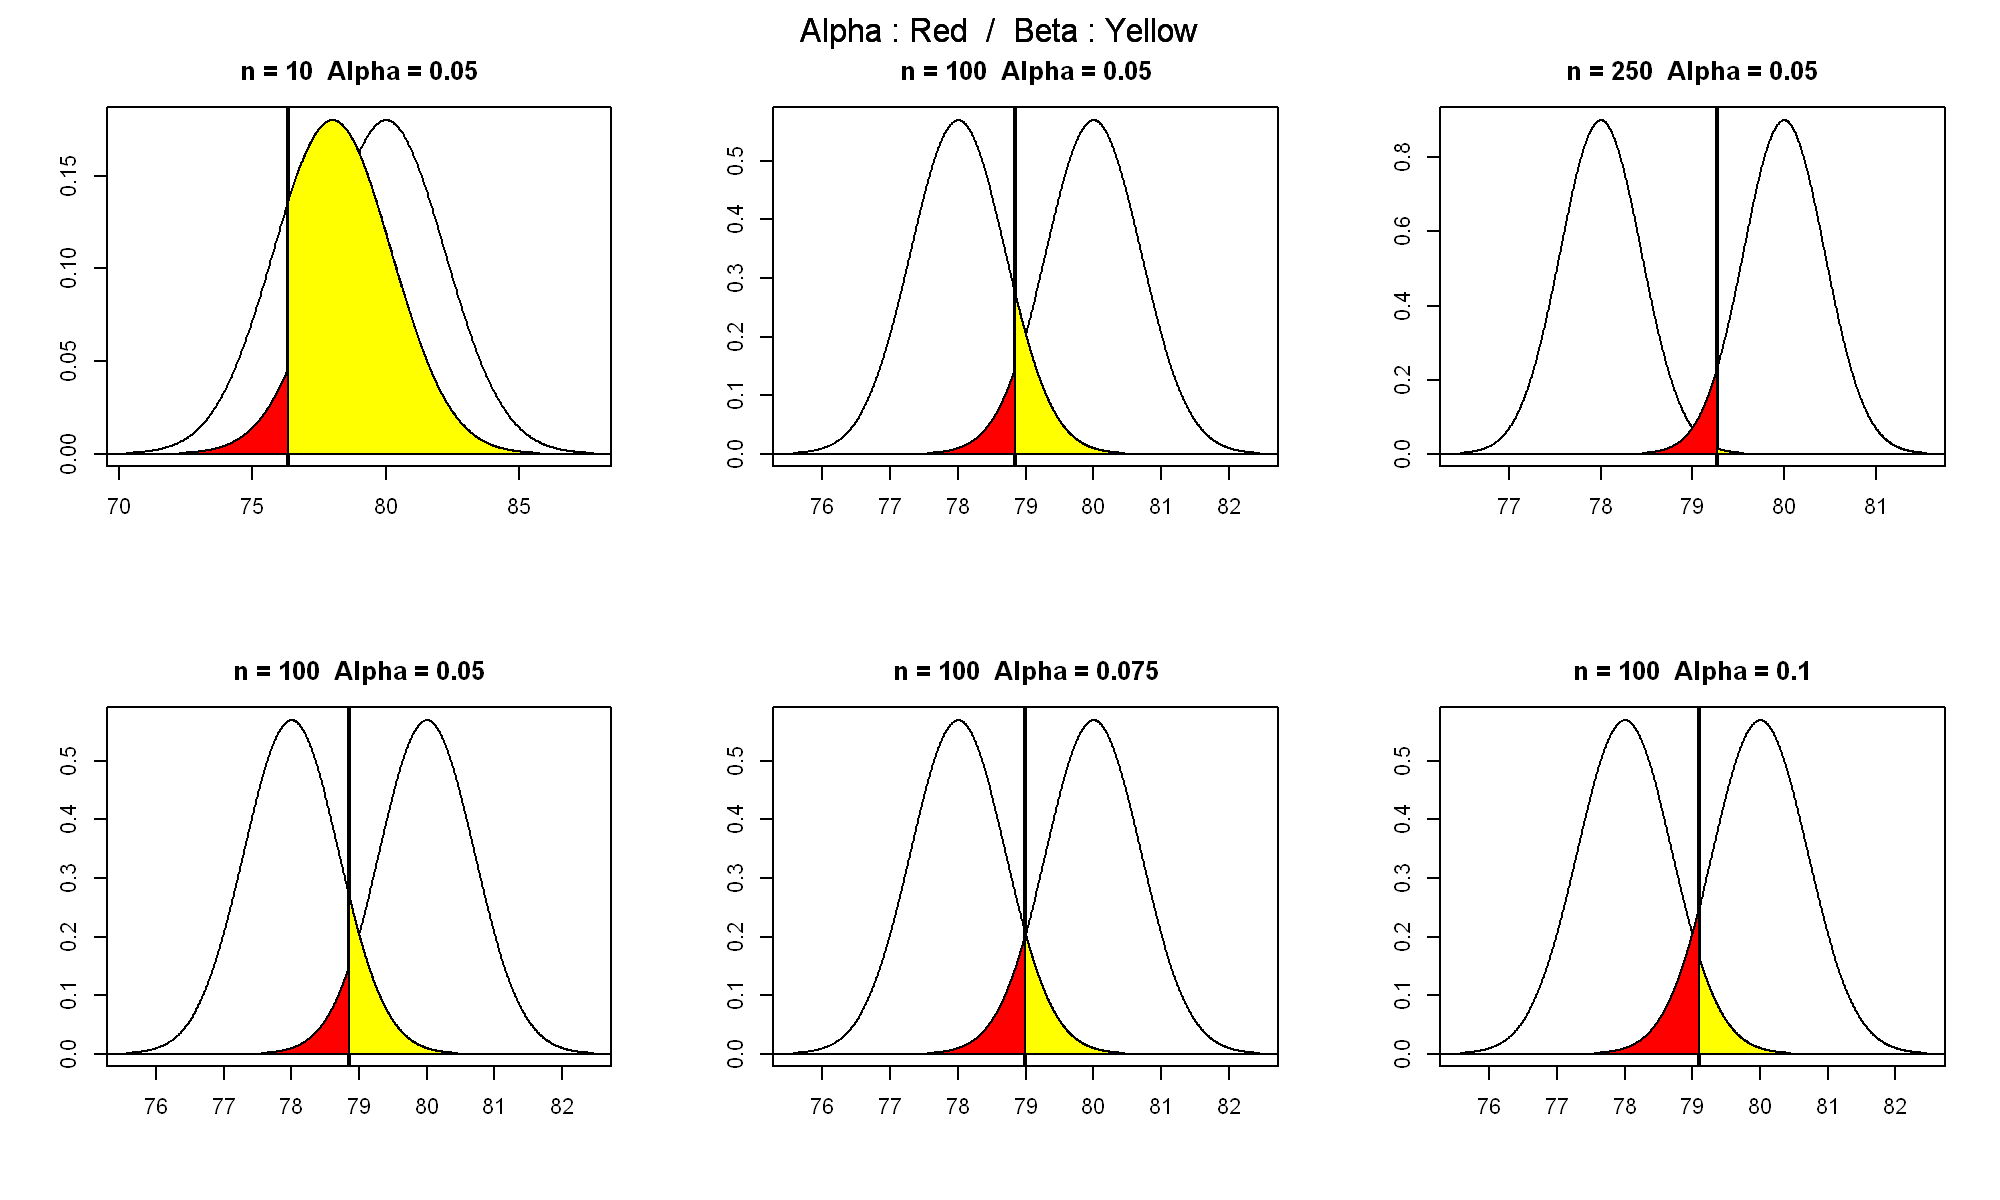

In [245]:
par(mfrow=c(2,3))

seq.n <- c(10, 100, 250)
seq.alpha <- c(0.05, 0.075, 0.1)
for(n in seq.n) {graphical.errors(0.05, n)}
for(alpha in seq.alpha) {graphical.errors(alpha, 100)}

> - Set parameters.

In [246]:
K <- 500
n <- 100
alpha <- 0.05

> - Compute alternate hypothesis acceptance threshold.

In [247]:
threshold <- m0+(sigma/sqrt(n))*qnorm(alpha, mean = 0, sd = 1)

> - ***freq.d1*** represents the frequency of the samples of size n for which the estimation of the mean allowed us to accept H1.

In [248]:
freq.d1<-FALSE
for(k in 1:K) { freq.d1 <- freq.d1 + (mean(rnorm(n,m0,sigma)) < threshold) }
freq.d1/K

[1] 0.064

> - Function plotting the curve of power $(1-\beta)$ for samples of different size $n$ for a given $\alpha$.

In [257]:
plot.alpha <- function(alpha, col){

#First sample size
n=10

#Computation
m.H1 <- seq(m0-2*sigma,m0,length=500)
threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
puissance <-pnorm((sqrt(n)/sigma)*(threshold-m.H1), mean = 0, sd = 1)

#Plots
plot(m.H1,
     puissance,
     type="l",
     main=paste("alpha = ", alpha),
     xlim=c(min(m.H1),max(m.H1)+1),
     ylim=c(min(puissance),1),
     sub ="", 
     xlab="H1", 
     ylab=expression(1-beta), 
     lwd =2, 
     col =col[1])

i <- 1
for(n in c(25,50,100,150)) {
    i <- i + 1
    threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
    puissance <- pnorm(threshold,m.H1,sigma/sqrt(n))
    lines(m.H1, puissance, type = "l", lwd = 2, col=col[i])
    legend(min(m.H1),
           0.9,
           cex=1,
           lty=1,
           lwd=2,
           bty='n',
           legend=paste("n = ",
                        c(10,25,50,100,150)),
           col=col)
    }
}

> - Plotting the power curves for different values of $\alpha$.

In [265]:
options(repr.plot.width=12, repr.plot.height=8, repr.plot.res = 180)

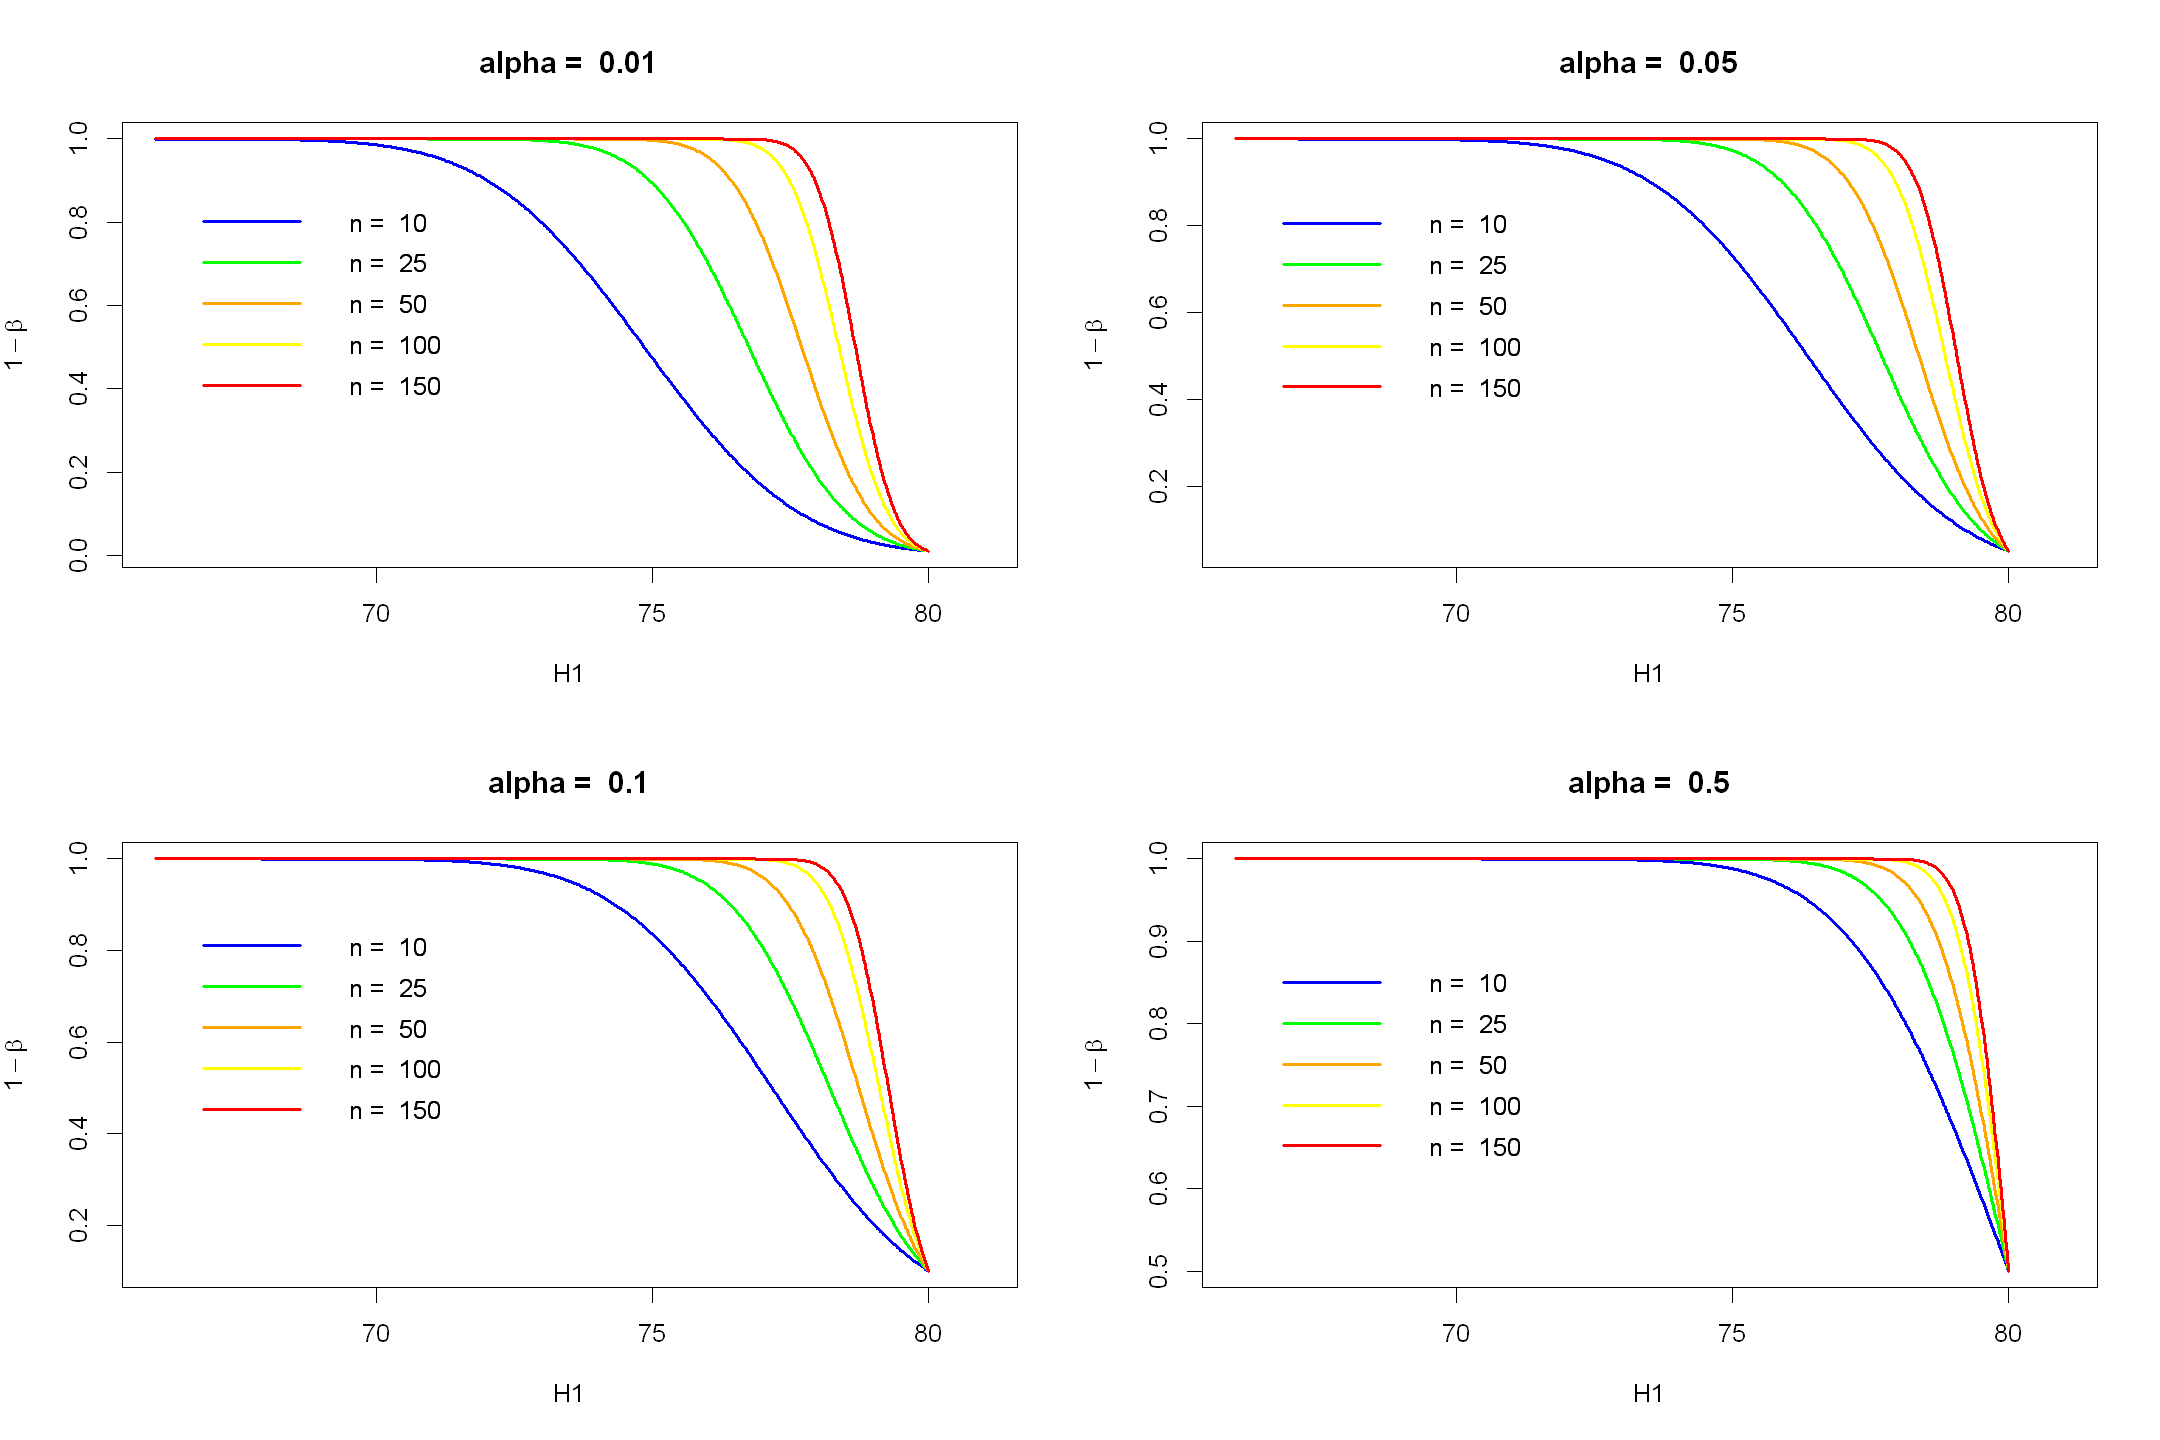

In [266]:
par(mfrow=c(2,2))

col <- c("blue","green","orange","yellow","red")
seq.alpha <- c(0.01, 0.05, 0.1, 0.5)
for(alpha in seq.alpha) {plot.alpha(alpha, col)}

***